In [100]:
import networkx as nx
import community
import matplotlib.pyplot as plt

In [101]:
import time
start_time = time.time()



In [102]:
G = nx.Graph()
fpath = "./dataset/facebook/"
egos = ['0','107','348','414','686','698','1684','1912','3437','3980']
node2Circle = {}
circle2Node = {}
#nodesPerCircle = [(1,)]

In [103]:
###    generate the graph
for ego in egos:
    e = int(ego)
    nodeLst = []
    node2Circle[e] = e
    
    edgeFile = fpath + ego +'.edges'
    f = open(edgeFile,'r')
    for line in f:
        m = line.split()
        fn = int(m[0])
        tn = int(m[1])
        G.add_edge(fn,tn)
    f.close()
    
    nodeFile = fpath + ego +'.feat'
    f = open(nodeFile,'r')
    for line in f:
        nodeLst.append(int(line.split()[0]))
    for n in nodeLst:
        node2Circle[n]=e
        if e==n: pass
        G.add_edge(e,n)
    f.close()

In [104]:
###   basic information about the graph
numNodes = len(G.nodes())
numEdges = len(G.edges())
numTri = sum(nx.triangles(G))/3
print("number of nodes:  ", numNodes)
print("number of edges: ",numEdges)
print("number of traingles: ",numTri)

number of nodes:   4039
number of edges:  88234
number of traingles:  2718247.0


In [105]:

adjacency_matrix = [ [ 0 for i in range(numNodes) ] for j in range(numNodes) ]

In [106]:
import numpy as np
for i in range(numNodes):
    for j in range(numNodes):
        if(i,j) in G.edges(i):
            adjacency_matrix[i][j] = 1

In [107]:
degreematrix = np.diag(np.sum(adjacency_matrix, axis=1))

In [108]:
laplacianmatrix = degreematrix - adjacency_matrix

In [109]:
sqrt_degreematrix = np.sqrt(degreematrix)

In [110]:
inv_matrix = np.linalg.inv(sqrt_degreematrix)

In [111]:
Lsymmetric = np.matmul(inv_matrix, laplacianmatrix)
Lsymmetric = np.matmul(Lsymmetric, inv_matrix)

In [112]:
from scipy.linalg import eigh
eigenvalues, eigenvectors = eigh(Lsymmetric) 

In [113]:
eigenvectors = eigenvectors[:,np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]

In [114]:
from sklearn.cluster import KMeans

# kmeans on first three vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=13)
kmeans.fit(eigenvectors[:,1:14])
colors = kmeans.labels_

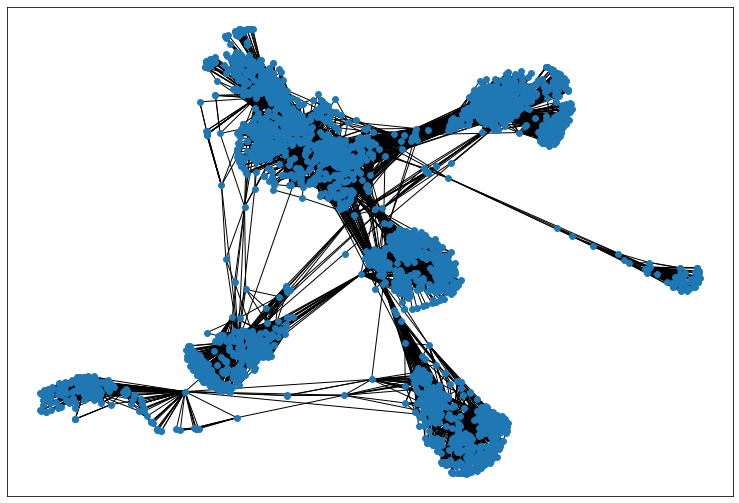

In [115]:
g = nx.read_edgelist('./dataset/facebook_combined.txt',create_using = nx.Graph(), nodetype = int)

sp = nx.spring_layout(g)
plt.figure(figsize=(13, 9))
nx.draw_networkx(g, pos = sp, with_labels = False,alpha = 1.0,node_size=35)
plt.show()

In [116]:
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]


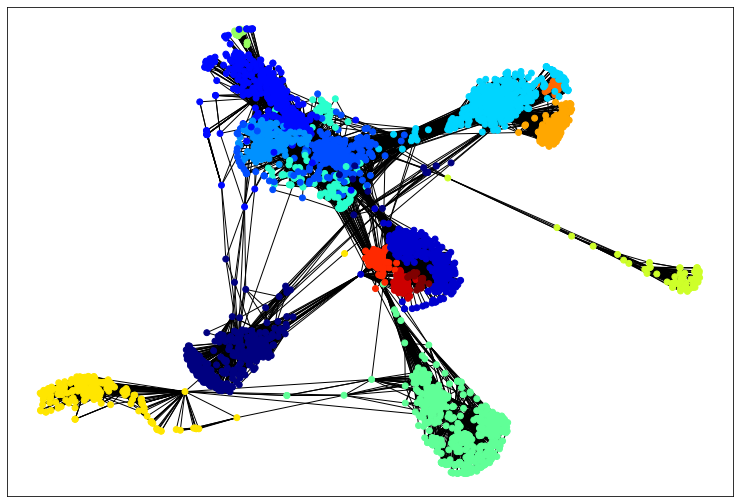

In [117]:

plt.figure(figsize=(13, 9))
nx.draw_networkx(G, pos=sp, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)
plt.show()

In [118]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 178.31519532203674 seconds ---
